# Risky Business

Harold has been boasting about his recent cryptocurrency returns. He's even bet you five bucks that his trading algorithm has made his returns better than yours. Calculate the standard deviation and sharpe ratio for each your portfolios to determine which portfolio is the better investment based off of the greatest risk to reward ratio.

In [2]:
import pandas as pd
import numpy as np
from pathlib import Path
%matplotlib inline

### Read in data

In [3]:
harold_portfolio_path = Path("../../Resources/harold_portfolio.csv")
my_portfolio_path = Path("../../Resources/my_portfolio.csv")

# Read in data
harold_portfolio = pd.read_csv(harold_portfolio_path, parse_dates=True, infer_datetime_format=True)
my_portfolio = pd.read_csv(my_portfolio_path, parse_dates=True, infer_datetime_format=True)

# Drop na
harold_portfolio = harold_portfolio.dropna()
my_portfolio = my_portfolio.dropna()

# Set Date as index
harold_portfolio = harold_portfolio.set_index('Date')
my_portfolio = my_portfolio.set_index('Date')

harold_portfolio.head()

,BTC,BTT,DOGE,ETH,LTC,XRP,SOLVE,XLM,TRON,ZIL
Date,,,,,,,,,,
2019-05-20,8118.39,0.001187,0.003041,261.09,95.06,0.398003,0.338667,0.135545,0.028509,0.017992
2019-05-19,8200.00,0.001056,0.003178,234.03,86.65,0.417700,0.300430,0.141485,0.029277,0.019170
2019-05-18,7262.40,0.000993,0.003005,244.59,89.88,0.372736,0.287630,0.128833,0.026823,0.017685
2019-05-17,7363.69,0.000957,0.002962,264.39,95.75,0.386193,0.259506,0.126562,0.027220,0.017892
2019-05-16,7878.96,0.000885,0.003168,249.00,102.26,0.419707,0.223316,0.137283,0.028857,0.018725


### Calculate daily returns 

In [5]:
# Calculate daily returns for each portfolio
harold_ret= harold_portfolio.pct_change()
my_ret= my_portfolio.pct_change()

my_ret

,BTC,DOGE,ETH,LTC,XRP,XLM
Date,,,,,,
2019-05-20,NaN,NaN,NaN,NaN,NaN,NaN
2019-05-19,-0.114341,0.045051,-0.103642,-0.088470,0.049490,0.043823
2019-05-18,0.013947,-0.054437,0.045122,0.037276,-0.107647,-0.089423
2019-05-17,0.069974,-0.014309,0.080952,0.065309,0.036103,-0.017627
2019-05-16,0.041168,0.069548,-0.058209,0.067990,0.086780,0.084709
...,...,...,...,...,...,...
2016-08-28,-0.007672,0.013216,0.020947,0.016129,-0.000170,-0.005906
2016-08-27,0.014849,-0.008696,0.007136,0.007937,0.005623,-0.044059
2016-08-26,-0.004716,0.061404,0.004429,0.000000,-0.001694,-0.003107


### `Concat` portfolios into one DataFrame

In [8]:
# Concat returns DataFrames
merged= pd.concat([harold_ret, my_ret], axis= 'columns', join= 'inner')
merged

,BTC,BTT,DOGE,ETH,LTC,XRP,SOLVE,XLM,TRON,ZIL,BTC,DOGE,ETH,LTC,XRP,XLM
Date,,,,,,,,,,,,,,,,
2019-05-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-05-19,0.010052,-0.110362,0.045051,-0.103642,-0.088470,0.049490,-0.112904,0.043823,0.026939,0.065474,-0.114341,0.045051,-0.103642,-0.088470,0.049490,0.043823
2019-05-18,-0.114341,-0.059659,-0.054437,0.045122,0.037276,-0.107647,-0.042606,-0.089423,-0.083820,-0.077465,0.013947,-0.054437,0.045122,0.037276,-0.107647,-0.089423
2019-05-17,0.013947,-0.036254,-0.014309,0.080952,0.065309,0.036103,-0.097778,-0.017627,0.014801,0.011705,0.069974,-0.014309,0.080952,0.065309,0.036103,-0.017627
2019-05-16,0.069974,-0.075235,0.069548,-0.058209,0.067990,0.086780,-0.139457,0.084709,0.060140,0.046557,0.041168,0.069548,-0.058209,0.067990,0.086780,0.084709
2019-05-15,0.041168,-0.037288,0.044192,-0.126747,-0.103364,0.086484,0.007420,-0.002047,0.086322,0.088224,-0.025892,0.044192,-0.126747,-0.103364,0.086484,-0.002047


### Calculate `std dev` for all data

In [9]:
# Calculate std dev
std= merged.std()
std

BTC      0.070488
BTT      0.030731
DOGE     0.050907
ETH      0.091517
LTC      0.084703
XRP      0.080277
SOLVE    0.059016
XLM      0.065825
TRON     0.064923
ZIL      0.064726
BTC      0.071562
DOGE     0.050907
ETH      0.091517
LTC      0.084703
XRP      0.080277
XLM      0.065825
dtype: float64

### Calculate `sharpe ratio` for all data

In [10]:
# Calculate sharpe ratio
sharpe= (merged.mean()*252)/(std*np.sqrt(252))
sharpe

BTC       0.936891
BTT     -32.935733
DOGE      5.615811
ETH      -5.638309
LTC      -0.796855
XRP       5.980254
SOLVE   -20.729548
XLM       0.937406
TRON      5.104548
ZIL       6.597156
BTC      -0.671876
DOGE      5.615811
ETH      -5.638309
LTC      -0.796855
XRP       5.980254
XLM       0.937406
dtype: float64

### Plot Sharpe Ratios

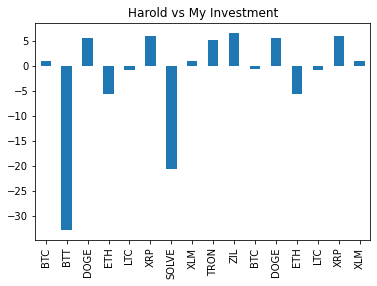

In [11]:
# Plot
sharpe.plot.bar(title= 'Harold vs My Investment')

### How many smart investments did Harold make compared to risky investments? How many did you make?

*Your answer here:*


### Which cryptos have been the smartest investment?

*Your answer here:*

### Calculate annualized std dev for each portfolio individually

In [12]:
# Calculate std dev for all investments for each portfolio
harold_std= harold_ret.std()*np.sqrt(252)
my_std= my_ret.std()*np.sqrt(252)

harold_std

BTC      1.118962
BTT      0.487842
DOGE     0.808117
ETH      1.452783
LTC      1.344613
XRP      1.274365
SOLVE    0.936847
XLM      1.044947
TRON     1.030614
ZIL      1.027496
dtype: float64

### Calculate the sharpe ratios for each individual portfolio

In [15]:
# Calculate sharpe ratio
harold_sharpe= harold_ret.mean()*252/harold_std
my_sharpe= my_ret.mean()*252/my_std

my_sharpe

BTC    -0.666636
DOGE   -0.020114
ETH    -0.389330
LTC    -0.285959
XRP    -0.212338
XLM    -0.092516
dtype: float64

### Average sharpe ratios for each portfolio and output to screen

In [16]:
# Averaging sharpe ratios
harold_avg= harold_sharpe.mean()
my_avg= my_sharpe.mean()

print (harold_avg)
print (my_avg)

-3.4928380351166615
-0.27781543864562924


### Compare Sharpe Ratios Averages

In [17]:
# Use comparison operator to determine if Harold's sharpe ratio avg is greater
harold_avg> my_avg

False

### Which portfolio is the smartest investment, based off of risk to reward ratio?

*Your answer here:*

In [20]:
"My portfolio!"

'My portfolio!'